In [1]:
%matplotlib inline
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

import cubesphere as cs

In [2]:
datadir = "~/FV3/rundirs/C48/INPUT/"
ds = cs.open_FV3data(datadir,"fv_tracer.res",verbose=True,restart=True)

opening fv_tracer.res.tile1.nc, opening atmos_static.tile1.nc
opening fv_tracer.res.tile2.nc, opening atmos_static.tile2.nc
opening fv_tracer.res.tile3.nc, opening atmos_static.tile3.nc
opening fv_tracer.res.tile4.nc, opening atmos_static.tile4.nc
opening fv_tracer.res.tile5.nc, opening atmos_static.tile5.nc
opening fv_tracer.res.tile6.nc, opening atmos_static.tile6.nc


In [3]:
ds

<xarray.Dataset>
Dimensions:  (pfull: 20, tile: 6, time: 1, x: 48, x_b: 49, y: 48, y_b: 49)
Coordinates:
  * x        (x) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0 ...
  * y        (y) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0 ...
  * pfull    (pfull) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 ...
  * time     (time) float64 1.0
  * x_b      (x_b) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 ...
  * y_b      (y_b) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 ...
    lon      (tile, y, x) float32 305.783 307.37 308.986 310.631 312.306 ...
    lat      (tile, y, x) float32 -34.8911 -35.5988 -36.2858 -36.951 ...
    lon_b    (tile, y_b, x_b) float32 305.0 306.573 308.174 309.805 311.465 ...
    lat_b    (tile, y_b, x_b) float32 -35.2644 -35.9889 -36.6926 -37.3743 ...
Dimensions without coordinates: tile
Data variables:
    sphum    (tile, time, pfull, y, x) float64 3e-06 3e-06 3e-06 3e-06 3e-06 ...
    liq_wat  (tile, time, pf

Must be careful when assigning data
- http://xarray.pydata.org/en/stable/indexing.html

In [4]:
da_layer = ds["plume01"].isel(pfull=-8).copy() # don't modify original data

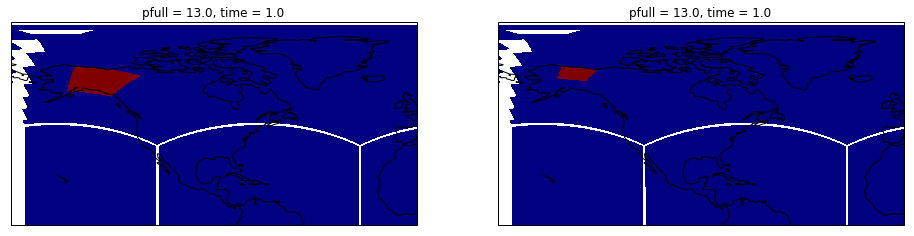

In [5]:
xedge,yedge=33,25
xsize1,ysize1 = 6,6
xsize2,ysize2 = 3,3

def set_and_plot(da,xedge,yedge,xsize,ysize,ax):
    da_temp = da.copy()

    # make a plume
    da_temp[:] = 3e-6
    da_temp[dict(tile=2,
                 x=slice(xedge,xedge+xsize),
                 y=slice(yedge,yedge+ysize))] = 1.0
    

    # plot
    da_temp["lon"] += 30.0 #should only affect plotting, not the simulation
    da_temp.isel(time=-1).cs.plot_CSlayer(ax=ax,cbar=False)
    da_temp["lon"] -= 30.0
    
    ax.set_ylim([0,90])
    ax.set_xlim([-180,0])
    
    return da_temp

plt.figure(figsize=(16,8))

ax1 = plt.subplot(1,2,1,projection=ccrs.PlateCarree())
da1 = set_and_plot(da_layer,xedge,yedge,xsize1,ysize1,ax1)

ax2 = plt.subplot(1,2,2,projection=ccrs.PlateCarree())
da2 = set_and_plot(da_layer,xedge,yedge,xsize2,ysize2,ax2)

### Write back

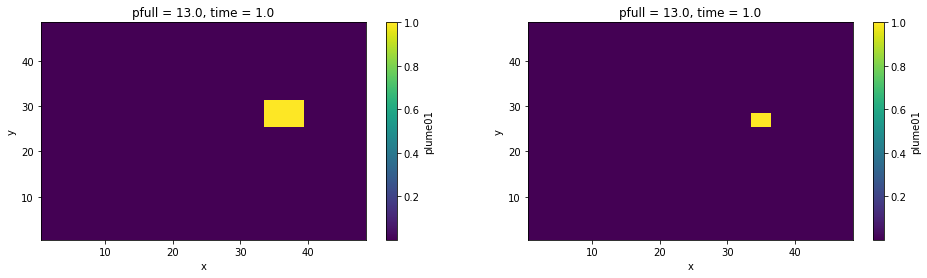

In [6]:
# check 
plt.figure(figsize=(16,4))
plt.subplot(1,2,1); da1.isel(tile=2).plot()
plt.subplot(1,2,2); da2.isel(tile=2).plot()

In [7]:
# only need to modify one tile
# python tile index starts from 0 but filename startsb from 1
ds_out = xr.open_dataset(datadir+"fv_tracer.res.tile3.nc")
ds_out.load() # load all data into memory

<xarray.Dataset>
Dimensions:  (Time: 1, xaxis_1: 48, yaxis_1: 48, zaxis_1: 20)
Coordinates:
  * xaxis_1  (xaxis_1) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 ...
  * yaxis_1  (yaxis_1) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 ...
  * zaxis_1  (zaxis_1) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 ...
  * Time     (Time) float64 1.0
Data variables:
    sphum    (Time, zaxis_1, yaxis_1, xaxis_1) float64 3e-06 3e-06 3e-06 ...
    liq_wat  (Time, zaxis_1, yaxis_1, xaxis_1) float64 3e-06 3e-06 3e-06 ...
    ice_wat  (Time, zaxis_1, yaxis_1, xaxis_1) float64 3e-06 3e-06 3e-06 ...
    cld_amt  (Time, zaxis_1, yaxis_1, xaxis_1) float64 3e-06 3e-06 3e-06 ...
    plume01  (Time, zaxis_1, yaxis_1, xaxis_1) float64 3e-06 3e-06 3e-06 ...
    plume02  (Time, zaxis_1, yaxis_1, xaxis_1) float64 3e-06 3e-06 3e-06 ...
    plume03  (Time, zaxis_1, yaxis_1, xaxis_1) float64 3e-06 3e-06 3e-06 ...
    plume04  (Time, zaxis_1, yaxis_1, xaxis_1) float64 3e-06 3e-06 3e-06 ...
 

In [8]:
# 6x6 boxes, 8th layer, standard size that is most consistent with previous paper
ds_out["plume01"][dict(zaxis_1= -8 )] = da1.isel(tile=2)

# 6x6 boxes, 7~8th layer
ds_out["plume02"][dict(zaxis_1= slice(-8,-6)) ] = da1.isel(tile=2)

# 3x3 boxes, 8th layer
ds_out["plume03"][dict(zaxis_1= -8 )] = da2.isel(tile=2)

# 3x3 boxes, 7~8th layer
ds_out["plume04"][dict(zaxis_1= slice(-8,-6) )] = da2.isel(tile=2)

# lower plumes. to see if how the diffusion rates differ
ds_out["plume05"][dict(zaxis_1= -7 )] = da1.isel(tile=2)
ds_out["plume06"][dict(zaxis_1= -6 )] = da1.isel(tile=2)
ds_out["plume07"][dict(zaxis_1= -5 )] = da1.isel(tile=2)
ds_out["plume08"][dict(zaxis_1= -4 )] = da1.isel(tile=2)

In [9]:
ds_out.to_netcdf(datadir+"fv_tracer.res.tile3.nc")

### Examine results

In [10]:
ds_check = cs.open_FV3data(datadir,"fv_tracer.res",verbose=True,restart=True)

opening fv_tracer.res.tile1.nc, opening atmos_static.tile1.nc
opening fv_tracer.res.tile2.nc, opening atmos_static.tile2.nc
opening fv_tracer.res.tile3.nc, opening atmos_static.tile3.nc
opening fv_tracer.res.tile4.nc, opening atmos_static.tile4.nc
opening fv_tracer.res.tile5.nc, opening atmos_static.tile5.nc
opening fv_tracer.res.tile6.nc, opening atmos_static.tile6.nc


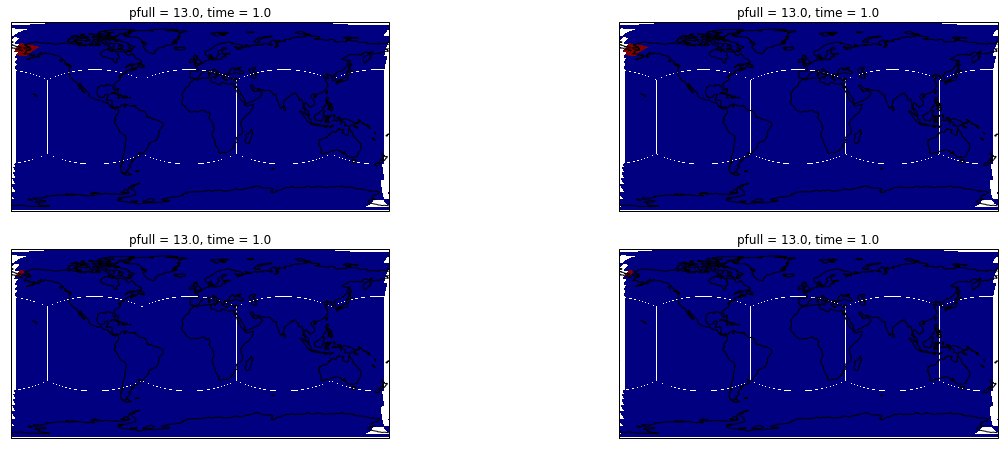

In [28]:
varnames = ["plume0{0}".format(i) for i in range(1,5)]
plt.figure(figsize=(20,16))

for i,varname in enumerate(varnames):
    ax_temp = plt.subplot(4,2,i+1,projection=ccrs.PlateCarree());
    ds_check[varname].isel(time=-1,pfull=-8).cs.plot_CSlayer(cbar=False,ax=ax_temp)

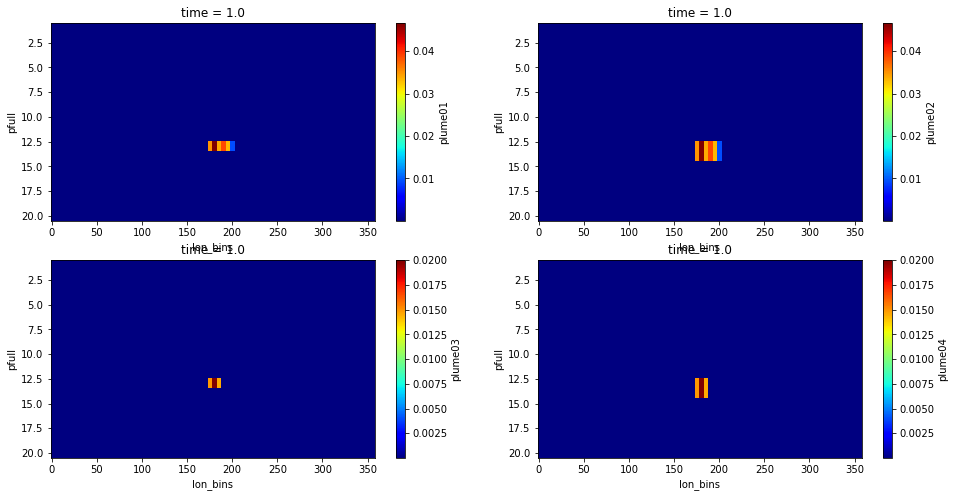

In [43]:
varnames = ["plume0{0}".format(i) for i in range(1,5)]
plt.figure(figsize=(16,8))

for i,varname in enumerate(varnames):
    plt.subplot(2,2,i+1)
    ds_check[varname].isel(time=-1).cs.meridional_mean().plot(cmap="jet",yincrease=False)